# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [12]:
# 1, i) Importando as libs
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

Vamos criar o gráfico de `net_bill` (gorjeta líquida, a conta menos a gorjeta), que será nossa variável depedente.

In [2]:
 # 1, ii) Carregando a base e criando a varíavel 'net bill'
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


In [3]:
# 1, iii) aplicando regressão linear usando statsmodels (modelo OLS)
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           5.02e-23
Time:                        23:51:46   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

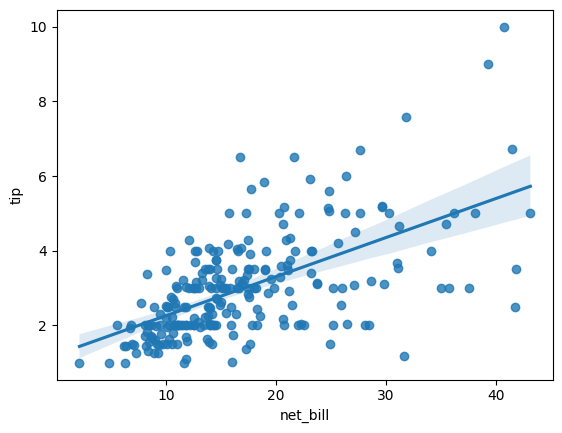

In [4]:
# 1, iv) Criando uma plotagem entre tips e net_bill pra ver a correlação
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.show()


In [5]:
# 1, iii) aplicando regressão linear usando statsmodels (modelo OLS)
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           5.02e-23
Time:                        23:51:46   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [16]:
# 2, i) aplicando regressão linear usando statsmodels, agora com a dependente `tip_pct`
reg_tip = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           1.52e-06
Time:                        00:03:36   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

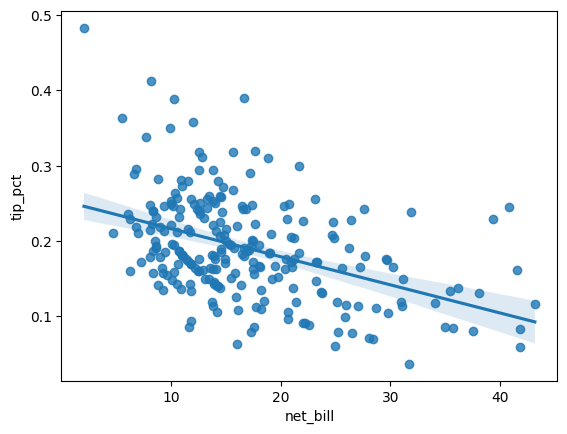

In [7]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.show()

O R² foi singelamente *inferior* quando analisamos a porcentagem da gorjeta ao invés de a gorjeta diretamente, com uma correlação inclusive *negativa* e muito mais dispersa.

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Sim, porém a comparação dos R-squared mostra uma diferença gritante entre os dois modelos: o modelo que usa a porcentagem da gorjeta é extremametne inferior, com um R² MENOR que 1%. Além disso, o scatterplot nos ajuda a mostrar uma relação negativa entre o valor da conta e o percentual da gorjeta, ou seja:

**As pessoas tendem a pagar um valor percentualmete baixo na gorjeta, mesmo com contas mais caras**, o que faz sentido, já que contas mais caras NATURALMENTE terão gorjetas maiores se estas forem baseadas numa mesma porcentagem -- que é o que a primeira análise nos revelou. Quando analisamos o valor da gorjeta, é claro que contas mais caras tem gorjetas mais caras, isso indica que as gorjetas seguem uma porcentagem fixa/comum uniforme que não depende do valor da conta.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [11]:
# 1) Valores preditos para tip_pct
predicoes_tip_pct = reg.fittedvalues
predicoes_tip_pct

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [15]:
# 2) Valores preditos para 'tip'
predicoes_tip = predicoes_tip_pct * tips['net_bill']

# 3) Calcular o r-quadrado para tip
r2_tip = r2_score(tips['tip'], predicoes_tip)
print(f'O R² do modelo para tip usando as porcentagens preditas pelo modelo é de {r2_tip:.2f}')

O R² do modelo para tip usando as porcentagens preditas pelo modelo é de 0.11


O R-quadrado é inferior ao modelo do item 1, que usava o valor direto da gorjeta ao invés do valor percentual. Nesse caso o valor percentual acaba sendo pouco útil para nós por que, como supomos, parece ter um valor percentual 'geral' que se mantém mesmo com contas mais altas. Podemos visualizar a tendência dessa porcentagem:

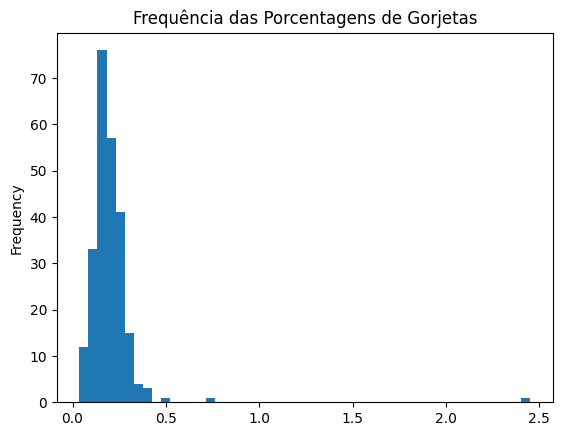

In [25]:
# 3, ii) Gráfico histograma com as frequências de cada porcentagem de gorjeta
tips['tip_pct'].plot(kind='hist', bins=50)
plt.title('Frequência das Porcentagens de Gorjetas')
plt.show()

In [27]:
# 3, iii) Valores médios e medianos das gorjetas
media_porcentagem_gorjetas = tips['tip_pct'].mean()
mediana_porcentagem_gorjetas = tips['tip_pct'].median()
print(f'A média do percentual de gorjetas é de {media_porcentagem_gorjetas:.2f} e a mediana é de {mediana_porcentagem_gorjetas:.2f}')

A média do percentual de gorjetas é de 0.20 e a mediana é de 0.18


Como os dados nos mostram, há uma grande concentração no percetual de gorjetas equivalente a 15~20% da conta total, o que faz essa variável ser mais uniforme e não ser uma boa preditora diretametne de tip.